In [1]:
import os
os.getcwd()
os.chdir("../..")
os.getcwd()

'C:\\Users\\omris\\OneDrive\\python\\me_toolbox'

# Multipul Bolts strength calculations

<table><tr>
<td> 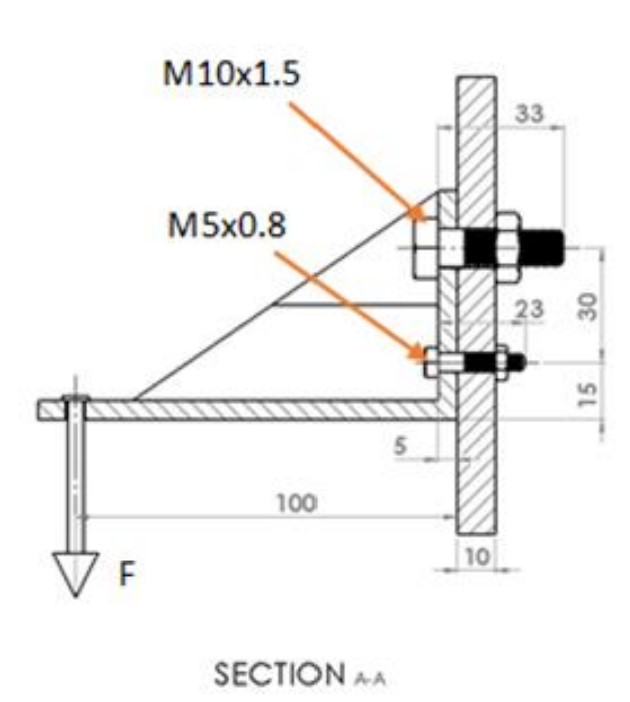 </td>
<td> 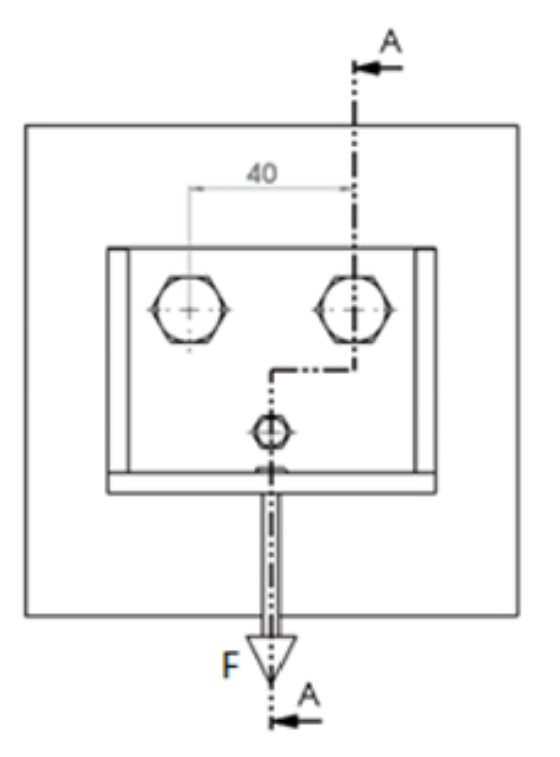 </td>
<td> 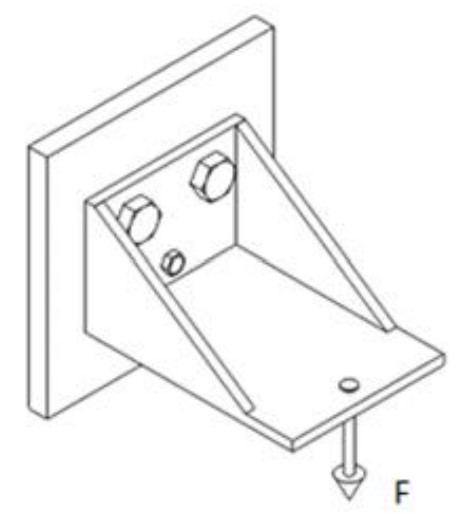 </td>
</tr></table>

A force of 8500$[N]$ is applied on the braket as shown in the images above,
The substrates and the bolts are made of steel with an elastic modulus of 207$[GPa]$,
The bolts are grade 9.8, the preload force on The M10 bolts is 32062.5$[N]$ and the preload force on The M5 bolt is 7850$[N]$


Importing the relevant Classes

In [2]:
from me_toolbox.fasteners import ThreadedFastener
from me_toolbox.fasteners import Bolt
from me_toolbox.fasteners import BoltPattern

## Defining the substrate layers

List of substrates thicknesses (in mm)

In [3]:
thickness = [5, 10]

List of substrates elasticity (in Mpa)

In [4]:
elastic = [207e3, 207e3]

Making a list made of the substrate thickness and elasticity pairs <br>
$[[mm,MPa],[mm,MPa]]$

In [5]:
layers = [[t, E] for t, E in zip(thickness, elastic)]  # [[25,153e3], [7,128e3], [25,207e3]]

import inflect
p = inflect.engine()

for i, layer in enumerate(layers):
    print(f"{p.ordinal(i+1)} layer: {layer[0]}mm , {layer[1]} MPa")

1st layer: 5mm , 207000.0 MPa
2nd layer: 10mm , 207000.0 MPa


## Prepering an M10 Fastener

M10 Bolt properties

In [6]:
diameter = 10 # [mm]
pitch = 1.5 # [mm]
length = 33 # [mm]
threaded_length = 26 # [mm]
grade = '9.8'
E = 207e3 # [MPa]

Using Bolt's built-in method to get the strength properties (in MPa) out of the grade and diameter

In [7]:
M10_Sy, M10_Sut, M10_Sp = Bolt.get_strength_prop(diameter, grade)

print(f"Proof Strength - Sp = {M10_Sp} [MPa]\n"
    f"Ultimate Tensile Strength - Sut = {M10_Sut} [MPa]\n"
    f"Yield Strength - Sy = {M10_Sy} [MPa]")


Proof Strength - Sp = 650 [MPa]
Ultimate Tensile Strength - Sut = 900 [MPa]
Yield Strength - Sy = 720 [MPa]


Defining a bolt object

In [8]:
M10 = Bolt(diameter, pitch, length, threaded_length, M10_Sy, M10_Sut, M10_Sp, E)

Defining an M10 threaded fastener object

In [9]:
M10_fastener = ThreadedFastener(M10, layers, nut=True, preload=32062.5)

***

***Estimating the preload***<br>
**In this case the preload is specified** but we can also use the<br>
Bolt's object built-in function to return an estimated preload.<br>
If the bolt is ment to be reused then the estimated preload is 75% of the bolt's proof load,<br>
If the bolt is not ment to be reused then the estimated preload is 90% of the bolt's proof load.

In [10]:
M10_estimated_preload = M10.estimate_preload(reused=True)
print(f"M10 Estimated Preload = {M10_estimated_preload:.2f}[N]")

M10 Estimated Preload = 28269.93[N]


***

## Prepering an M5 Fastener

M5 Bolt properties

In [11]:
diameter = 5 # [mm]
pitch = 0.8 # [mm]
length = 23 # [mm]
threaded_length = 16 # [mm]
grade = '9.8'
E = 207e3 # [MPa]

Using Bolt's built-in method to get the strength properties (in MPa) out of the grade and diameter

In [12]:
M5_Sy, M5_Sut, M5_Sp = Bolt.get_strength_prop(diameter, grade)

print(f"Proof Strength - Sp = {M5_Sp} [MPa]\n"
    f"Ultimate Tensile Strength - Sut = {M5_Sut} [MPa]\n"
    f"Yield Strength - Sy = {M5_Sy} [MPa]")


Proof Strength - Sp = 650 [MPa]
Ultimate Tensile Strength - Sut = 900 [MPa]
Yield Strength - Sy = 720 [MPa]


Defining a bolt object

In [13]:
M5 = Bolt(diameter, pitch, length, threaded_length, M5_Sy, M5_Sut, M5_Sp, E)

Defining an M5 threaded fastener object

In [14]:
M5_fastener = ThreadedFastener(M5, layers, nut=True, preload=7850)

## Creating the Bolt Pattern

Making a list of the fasteners and another list of their locations in the pattern.

In [15]:
fasteners = [M10_fastener, M10_fastener, M5_fastener]
fasteners_locations = [[20, 45, 0], [-20, 45, 0], [0, 15, 0]]

The vector sum of the external forces

In [16]:
force = [0, -8500, 0]  # [N]

The location where the force is applied

In [17]:
force_location = [0, 0, 100]

List containing two points which discribs the position and direction of the axis of rotation,<br>
That is the axis in which to bolted part want to rotate around when the force is applied.

In [18]:
axis_of_rotation = [[0, 0], [1, 0]]

In [19]:
pattern = BoltPattern(fasteners, fasteners_locations, force, force_location, axis_of_rotation, 'shank')

## Static Analysis

### Some parameters

In [20]:
print(f"M5 Bolt: \nShank Length - ld = {M5.shank_length}[mm]\n" 
      f"Griped Thread length - lt = {M5_fastener.griped_thread_length}[mm]\n"
      f"Nominal Area - Ad = {M5.nominal_area:.2f}[mm^2]\n"
      f"Stress Area - At = {M5.stress_area:.2f}[mm^2]\n"
      f"Bolt Stiffness - kb = {M5_fastener.bolt_stiffness*1e-3:.2f} [kN/mm]\n"
      f"member stiffness - km = {M5_fastener.member_stiffness*1e-3:.2f} [kN/mm]\n"
      f"fastener stiffness - C = {M5_fastener.fastener_stiffness:.3f}")

M5 Bolt: 
Shank Length - ld = 7[mm]
Griped Thread length - lt = 8[mm]
Nominal Area - Ad = 19.63[mm^2]
Stress Area - At = 14.18[mm^2]
Bolt Stiffness - kb = 224.86 [kN/mm]
member stiffness - km = 967.97 [kN/mm]
fastener stiffness - C = 0.189


In [21]:
print(f"M10 Bolt: \nShank Length - ld = {M10.shank_length}[mm]\n" 
      f"Griped Thread length - lt = {M10_fastener.griped_thread_length}[mm]\n"
      f"Nominal Area - Ad = {M10.nominal_area:.2f}[mm^2]\n"
      f"Stress Area - At = {M10.stress_area:.2f}[mm^2]\n"
      f"Bolt Stiffness - kb = {M10_fastener.bolt_stiffness*1e-3:.2f} [kN/mm]\n"
      f"member stiffness - km = {M10_fastener.member_stiffness*1e-3:.2f} [kN/mm]\n"
      f"fastener stiffness - C = {M10_fastener.fastener_stiffness:.3f}")

M10 Bolt: 
Shank Length - ld = 7[mm]
Griped Thread length - lt = 8[mm]
Nominal Area - Ad = 78.54[mm^2]
Stress Area - At = 57.99[mm^2]
Bolt Stiffness - kb = 911.56 [kN/mm]
member stiffness - km = 2652.80 [kN/mm]
fastener stiffness - C = 0.256


### Finding forces and stresses

Total shear forces $(F_{i})$ and shear stress $(τ)$ in each fastener.

In [22]:
for i, shear_force in enumerate(pattern.total_shear_force):
    print(f"{pattern.fasteners[i]} - Fi_{i+1} = [{shear_force[0]:.2f}, {shear_force[1]:.2f}, {shear_force[2]:.2f}][N]")

print(f"\nshear stress - τ = {["%.2f" % stress for stress in pattern.shear_stress]} [MPa]")

Fastener(M10) - Fi_1 = [0.00, -3777.78, 0.00][N]
Fastener(M10) - Fi_2 = [0.00, -3777.78, 0.00][N]
Fastener(M5) - Fi_3 = [0.00, -944.44, 0.00][N]

shear stress - τ = ['48.10', '48.10', '48.10'] [MPa]


Fastener Load $(P)$, Bolt Load $(F_{b})$, Normal stress $(σ)$ and Equivalent stress $(σ_{eq})$

In [23]:
print(f"Fastener Load     - P    = {["%.2f" % load for load in pattern.fastener_load]}\n"
      f"Bolt Load         - Fb   = {["%.2f" % load for load in pattern.bolt_load]}\n"
      f"Normal stress     - σ    = {["%.2f" % stress for stress in pattern.normal_stress]}\n")
      

Fastener Load     - P    = ['9272.06', '9272.06', '1034.31']
Bolt Load         - Fb   = ['34433.77', '34433.77', '8044.98']
Normal stress     - σ    = ['593.79', '593.79', '567.24']



The equivalent stresses on each bolt $( σ_{eq}^i=\sqrt{σ_{i}^2+3τ_{i}^2} )$

In [24]:
print(f"Equivalent stress - σ_eq = {["%.2f" % stress for stress in pattern.equivalent_stresses]}\n")

print(f"just to clearify every item in the list is the equivalent stress for each fastener:")
for i, stress in enumerate(pattern.equivalent_stresses):
    print(f"{pattern.fasteners[i]} - σ_eq_{i+1} = {stress:.2f}[MPa]")


Equivalent stress - σ_eq = ['599.61', '599.61', '573.33']

just to clearify every item in the list is the equivalent stress for each fastener:
Fastener(M10) - σ_eq_1 = 599.61[MPa]
Fastener(M10) - σ_eq_2 = 599.61[MPa]
Fastener(M5) - σ_eq_3 = 573.33[MPa]


### Finding safty factors ###

#### Seperation Safety Factor - $n_{0}$<br> ####
Is the non-separation safety factor between the substrates,<br>
which is a necessary condition for the fastener to function.

In [25]:
for i, fastener in enumerate(pattern.fasteners):
    print(f"{fastener} - n0 = {fastener.separation_safety_factor(pattern.fastener_load[i]):.2f}")

Fastener(M10) - n0 = 4.65
Fastener(M10) - n0 = 4.65
Fastener(M5) - n0 = 9.35


#### Load Safety Factor - $n_{L}$ <br> ####
Means how many times the external load (P) can be multiply until reaching<br>
the proof strength (Sp) of the bolt.

In [26]:
for i, fastener in enumerate(pattern.fasteners):
    print(f"{fastener} - nL = {fastener.load_safety_factor(pattern.equivalent_stresses[i]):.2f}")

Fastener(M10) - nL = 2.08
Fastener(M10) - nL = 2.08
Fastener(M5) - nL = 4.87


#### Proof Safety Factor - $n_{p}$ <br> ####
Means how many times the Bolt load ($F_{b}$) can be multiply until reaching<br>
the proof strength (Sp) of the bolt.

In [27]:
for i, fastener in enumerate(pattern.fasteners):
    print(f"{fastener} - np = {fastener.proof_safety_factor(pattern.equivalent_stresses[i]):.2f}")

Fastener(M10) - np = 1.08
Fastener(M10) - np = 1.08
Fastener(M5) - np = 1.13


## Fatigue Analisys

In [28]:
 from me_toolbox.fatigue import EnduranceLimit, FatigueAnalysis

In [29]:
Fmin = [0, -6500, 0]  # [N]
Fmax = [0, -8500, 0]  # [N]

Using the EnduranceLimit.unmodified_Se method to get the unmodified endurance limit,<br>
**Note:** *The endurance limit can be found in the material property*

In [30]:
M10_unmodified_Se = EnduranceLimit.unmodified_Se(M10_Sut, 'steel')
M5_unmodified_Se = EnduranceLimit.unmodified_Se(M5_Sut, 'steel')
print(f"M10 - Unmodified Se={M10_unmodified_Se},\nM5 - Unmodified Se={M5_unmodified_Se}")

M10 - Unmodified Se=450.0,
M5 - Unmodified Se=450.0


Calculating the modified endurance limit

In [31]:
M10_Se = M10.endurance_limit(M10_unmodified_Se, surface_finish='cold-drawn', temp=300, reliability=0.9)
M5_Se = M10.endurance_limit(M5_unmodified_Se, surface_finish='cold-drawn', temp=300, reliability=0.9)
print(f"M10 - Se={M10_Se},\nM5 - Se={M5_Se}")

M10 - Se=<me_toolbox.fatigue.endurance_limit.EnduranceLimit object at 0x00000286764827E0>,
M5 - Se=<me_toolbox.fatigue.endurance_limit.EnduranceLimit object at 0x000002866D9A2F60>


Calculating the mean and alternating stresses in the bolt pattern

In [32]:
σa, τa, σm, τm = pattern.variable_loading_stresses(Fmin, Fmax)
print(f"variable stresses in each bolt:")
print(f"σa = {σa},\nτa={τa},\nσm={σm},\nτm={τm}")

variable stresses in each bolt:
σa = [4.81073616 4.81073616 1.61736502],
τa=[5.65884242 5.65884242 5.65884242],
σm=[588.98141572 588.98141572 565.62739024],
τm=[42.44131816 42.44131816 42.44131816]


Adding the stress concentration factor(Kf) to the bolt object

In [33]:
Kf = FatigueAnalysis.calc_thread_kf(9.8, 'Rolled Threads')
M10.Kf = Kf
M5.Kf = Kf

In [34]:
variable_eq_stress = pattern.variable_equivalent_stresses([M10_Se, M10_Se, M5_Se], Fmin, Fmax)

In [35]:
print(f"variable equivalent stresses:\n")
for bolt,eq in zip(pattern.fasteners, variable_eq_stress):
    print(f"{bolt} - Mean stress:{eq['mean']:.2f} - Alternating stress:{eq['alt']:.2f}")

variable equivalent stresses:

Fastener(M10) - Mean stress:593.55 - Alternating stress:33.95
Fastener(M10) - Mean stress:593.55 - Alternating stress:33.95
Fastener(M5) - Mean stress:570.38 - Alternating stress:29.95


In [38]:
safety_factors = pattern.fatigue_safety_factor([M10_Se, M10_Se, M5_Se], Fmin, Fmax)
print(f"fatigue safety factor:\n")
for bolt,pair in zip(pattern.fasteners, safety_factors):
    print(f"{bolt} - fatigue safety factor: {pair['fatigue']:.2f} - static safety factor: {pair['static']:.2f}")

fatigue safety factor:

Fastener(M10) - fatigue safety factor: 2.58 - static safety factor: 1.04
Fastener(M10) - fatigue safety factor: 2.58 - static safety factor: 1.04
Fastener(M5) - fatigue safety factor: 3.48 - static safety factor: 1.08
